In [101]:
import pandas as pd
import time

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np


In [102]:
# Load data from MySQL
df = pd.read_csv('COP26(2)50k.csv',index_col=0)

df1 = df[['Polarity', 'Tweets']]

In [103]:
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'
    
df1['Analysis'] = df1['Polarity'].apply(getAnalysis)

C:\Users\shama\AppData\Local\Temp\ipykernel_12884\1031701789.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Analysis'] = df1['Polarity'].apply(getAnalysis)


In [104]:
df1['Analysis'].value_counts()

Positive    24955
Neutral     15194
Negative     9852
Name: Analysis, dtype: int64

In [105]:
def getAnalysis(score):
    if score ==  'Negative':
        return -1
    elif score == 'Neutral':
        return 0
    else:
        return 1
    
df1['polarity'] = df1['Analysis'].apply(getAnalysis)

C:\Users\shama\AppData\Local\Temp\ipykernel_12884\3346998285.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['polarity'] = df1['Analysis'].apply(getAnalysis)


In [106]:
# Seperating positive and negative rows
df_pos = df1[df1['polarity'] == 1]
df_neg = df1[df1['polarity'] == -1]

print(len(df_pos), len(df_neg))

24955 9852


In [107]:
df2 = pd.concat([df_pos, df_neg])
len(df2)

34807

Cleaning and Processing the Data

Tokenization

In [108]:
from time import time
start_time = time()

from nltk.tokenize import TweetTokenizer

tk = TweetTokenizer(reduce_len=True)

data = []


X = df2['Tweets'].tolist()
Y = df2['Polarity'].tolist()

# Building our data list, that is a list of tuples, where each tuple is a pair of the tokenized text
for x, y in zip(X, Y):
    if y == 1:
        data.append((tk.tokenize(x), 1))
    else:
        data.append((tk.tokenize(x), -1))
        
# Printing the CPU time and the first 5 elements of our 'data' list
print('CPU Time:', time() - start_time)
data[:5]

CPU Time: 9.665166139602661


[(['"',
   'India',
   'has',
   'declined',
   'to',
   'update',
   'its',
   'official',
   'climate',
   'goal',
   'at',
   'the',
   'United',
   'Nations',
   'climate',
   'negotiations',
   ',',
   'holding',
   'out',
   'for',
   'rich',
   'countries',
   'to',
   'first',
   'offer',
   '$',
   '1',
   'trillion',
   'in',
   'climate',
   'finance',
   'by',
   'the',
   'end',
   'of',
   'the',
   'decade',
   '.',
   '"',
   'Climate',
   'change',
   'mitigation',
   'by',
   'blackmail',
   '.',
   'Will',
   'make',
   'a',
   'great',
   'movie',
   '.',
   '🤣'],
  -1),
 (['This',
   'is',
   'relevant',
   '.',
   'US',
   'military',
   'is',
   'an',
   'enormous',
   'driver',
   'of',
   'climate',
   'change',
   'and',
   'pollution',
   '.',
   'https://t.co/aBNCKoiybZ'],
  -1),
 (['I',
   'love',
   'this',
   'case',
   '.',
   'Just',
   'blatant',
   'corruption',
   'and',
   'public',
   'corruption',
   'of',
   'the',
   'highest',
   'form',
   'wi

Lemmatization

In [109]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\shama\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [110]:
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer

print(pos_tag(data[0][0]))

[('"', 'NN'), ('India', 'NNP'), ('has', 'VBZ'), ('declined', 'VBN'), ('to', 'TO'), ('update', 'VB'), ('its', 'PRP$'), ('official', 'JJ'), ('climate', 'NN'), ('goal', 'NN'), ('at', 'IN'), ('the', 'DT'), ('United', 'NNP'), ('Nations', 'NNP'), ('climate', 'NN'), ('negotiations', 'NNS'), (',', ','), ('holding', 'VBG'), ('out', 'RP'), ('for', 'IN'), ('rich', 'JJ'), ('countries', 'NNS'), ('to', 'TO'), ('first', 'VB'), ('offer', 'VB'), ('$', '$'), ('1', 'CD'), ('trillion', 'CD'), ('in', 'IN'), ('climate', 'NN'), ('finance', 'NN'), ('by', 'IN'), ('the', 'DT'), ('end', 'NN'), ('of', 'IN'), ('the', 'DT'), ('decade', 'NN'), ('.', '.'), ('"', 'JJ'), ('Climate', 'NNP'), ('change', 'NN'), ('mitigation', 'NN'), ('by', 'IN'), ('blackmail', 'NN'), ('.', '.'), ('Will', 'NNP'), ('make', 'VB'), ('a', 'DT'), ('great', 'JJ'), ('movie', 'NN'), ('.', '.'), ('🤣', 'NN')]


In [111]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shama\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\shama\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [112]:
def lemmatize_sentence(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for word, tag in pos_tag(tokens):

        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatized_sentence.append(lemmatizer.lemmatize(word, pos))
    return lemmatized_sentence

print(lemmatize_sentence(data[0][0]))

['"', 'India', 'have', 'decline', 'to', 'update', 'its', 'official', 'climate', 'goal', 'at', 'the', 'United', 'Nations', 'climate', 'negotiation', ',', 'hold', 'out', 'for', 'rich', 'country', 'to', 'first', 'offer', '$', '1', 'trillion', 'in', 'climate', 'finance', 'by', 'the', 'end', 'of', 'the', 'decade', '.', '"', 'Climate', 'change', 'mitigation', 'by', 'blackmail', '.', 'Will', 'make', 'a', 'great', 'movie', '.', '🤣']


Cleaning the dataa

In [113]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shama\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [114]:
import re, string

from nltk.corpus import stopwords
STOP_WORDS = stopwords.words('english')
new_stopwords = ['climate change', 'climate', 'change', 'climatechange']
STOP_WORDS.extend(new_stopwords)

def cleaned(token):
    if token == 'u':
        return 'you'
    if token == 'r':
        return 'are'
    if token == 'some1':
        return 'someone'
    if token == 'yrs':
        return 'years'
    if token == 'hrs':
        return 'hours'
    if token == 'mins':
        return 'minutes'
    if token == 'secs':
        return 'seconds'
    if token == 'pls' or token == 'plz':
        return 'please'
    if token == '2morow':
        return 'tomorrow'
    if token == '2day':
        return 'today'
    if token == '4got' or token == '4gotten':
        return 'forget'
    if token == 'amp' or token == 'quot' or token == 'lt' or token == 'gt' or token == '½25':
        return ''
    return token

def remove_noise(tweet_tokens):

    cleaned_tokens = []

    for token, tag in pos_tag(tweet_tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)

        token = re.sub("(@[A-Za-z0-9_]+)","", token)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        cleaned_token = cleaned(token.lower())
        
        if cleaned_token not in string.punctuation and len(cleaned_token) > 2 and cleaned_token not in STOP_WORDS:
            cleaned_tokens.append(cleaned_token)
            
    return cleaned_tokens

# Prevewing the remove_noise() output
print(remove_noise(data[0][0]))

['india', 'decline', 'update', 'official', 'goal', 'united', 'nations', 'negotiation', 'hold', 'rich', 'country', 'first', 'offer', 'trillion', 'finance', 'end', 'decade', 'mitigation', 'blackmail', 'make', 'great', 'movie']


In [115]:
start_time = time()

def list_to_dict(cleaned_tokens):
    return dict([token, True] for token in cleaned_tokens)

cleaned_tokens_list = []

# Removing noise from all the data
for tokens, label in data:
    cleaned_tokens_list.append((remove_noise(tokens), label))

print('Removed Noise, CPU Time:', time() - start_time)
start_time = time()

final_data = []

for tokens, label in cleaned_tokens_list:
    final_data.append((list_to_dict(tokens), label))
    
print('Data Prepared for model, CPU Time:', time() - start_time)

# Previewing our final (tokenized, cleaned and lemmatized) data list
final_data[:5]

Removed Noise, CPU Time: 85.41034483909607
Data Prepared for model, CPU Time: 0.7593057155609131


[({'india': True,
   'decline': True,
   'update': True,
   'official': True,
   'goal': True,
   'united': True,
   'nations': True,
   'negotiation': True,
   'hold': True,
   'rich': True,
   'country': True,
   'first': True,
   'offer': True,
   'trillion': True,
   'finance': True,
   'end': True,
   'decade': True,
   'mitigation': True,
   'blackmail': True,
   'make': True,
   'great': True,
   'movie': True},
  -1),
 ({'relevant': True,
   'military': True,
   'enormous': True,
   'driver': True,
   'pollution': True},
  -1),
 ({'love': True,
   'case': True,
   'blatant': True,
   'corruption': True,
   'public': True,
   'high': True,
   'form': True,
   'without': True,
   'peep': True,
   'leader': True,
   'think': True,
   'summit': True,
   'would': True,
   'mention': True,
   'pelosi': True,
   'probably': True,
   'busy': True,
   'officiate': True,
   'oil': True,
   'oligarchs': True,
   'wedding': True,
   'notice': True},
  -1),
 ({'bravo': True,
   'first': Tru

Visualizing the data

Positive words


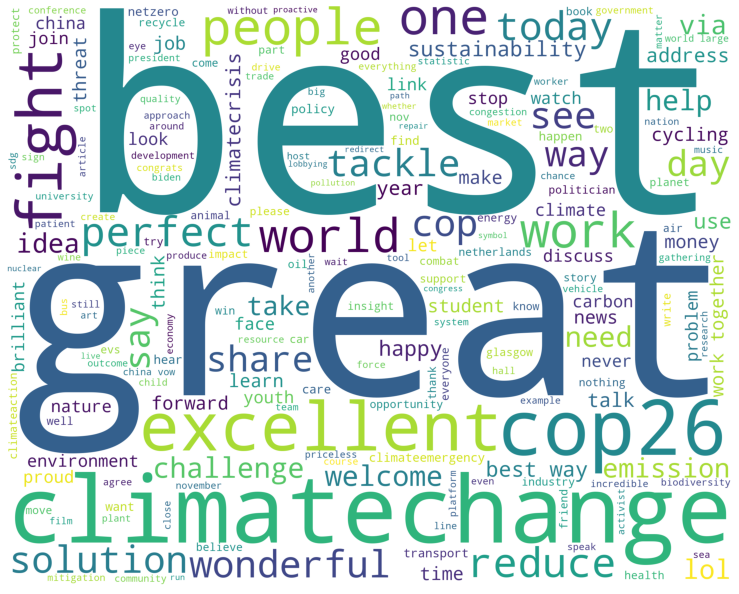

Negative words


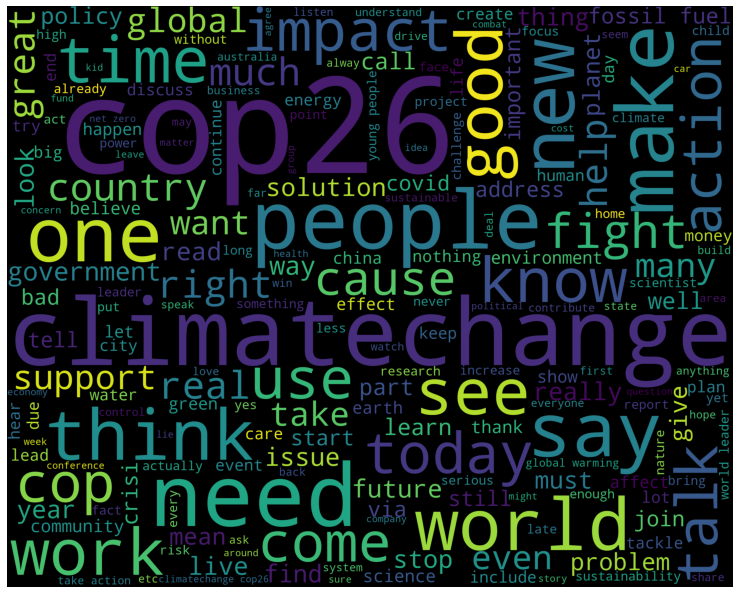

CPU Time: 25.93582034111023


In [116]:
start_time = time()

from wordcloud import WordCloud, STOPWORDS

positive_words = []
negative_words = []

for i in range(len(cleaned_tokens_list)):
    if cleaned_tokens_list[i][1] == 1:
        positive_words.extend(cleaned_tokens_list[i][0])
    else:
        negative_words.extend(cleaned_tokens_list[i][0])

# Defining our word cloud drawing function
def wordcloud_draw(data, color = 'black'):
    wordcloud = WordCloud(stopwords = STOPWORDS,
                          background_color = color,
                          width = 2500,
                          height = 2000
                         ).generate(' '.join(data))
    plt.figure(1, figsize = (13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(positive_words, 'white')
print("Negative words")
wordcloud_draw(negative_words)        

print('CPU Time:', time() - start_time)

Naive Bayesian Model

Splitting the data

In [117]:

import random

random.Random(140).shuffle(final_data)

trim_index = int(len(final_data) * 0.9)

train_data = final_data[:trim_index]
test_data = final_data[trim_index:]

Training the model

In [118]:
start_time = time()

from nltk.classify.scikitlearn import SklearnClassifier
from nltk import classify
from nltk import NaiveBayesClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier


In [119]:
classifier = NaiveBayesClassifier.train(train_data)
print('------------- NaiveBayes -------------')
print('Accuracy on train data:', classify.accuracy(classifier, train_data))
print('Accuracy on test data:', classify.accuracy(classifier, test_data))

classifier2 = nltk.classify.SklearnClassifier(SVC())
classifier2.train(train_data)
print('------------- SVC -------------')
print('Accuracy on train data:', classify.accuracy(classifier2, train_data))
print('Accuracy on test data:', classify.accuracy(classifier2, test_data))

classifier3 = nltk.classify.SklearnClassifier(MultinomialNB())
classifier3.train(train_data)
print('------------- MultinomialNB -------------')
print('Accuracy on train data:', classify.accuracy(classifier3, train_data))
print('Accuracy on test data:', classify.accuracy(classifier3, test_data))

classifier4 = nltk.classify.SklearnClassifier(LogisticRegression())
classifier4.train(train_data)
print('------------- Logisitic Reg -------------')
print('Accuracy on train data:', classify.accuracy(classifier4, train_data))
print('Accuracy on test data:', classify.accuracy(classifier4, test_data))
'''
NuSVC_classifier = nltk.classify.SklearnClassifier(NuSVC())
NuSVC_classifier.train(train_data)
print('------------- NuSVC -------------')
print('Accuracy on train data:', classify.accuracy(NuSVC_classifier, train_data))
print('Accuracy on test data:', classify.accuracy(NuSVC_classifier, test_data))'''

# Output the model accuracy on the train and test data

# Output the words that provide the most information about the sentiment of a tweet.
# These are words that are heavily present in one sentiment group and very rarely present in the other group.
print(classifier.show_most_informative_features(20))

print('\nCPU Time:', time() - start_time)

------------- NaiveBayes -------------
Accuracy on train data: 0.4972546766264445
Accuracy on test data: 0.5840275782821028
------------- SVC -------------
Accuracy on train data: 0.9945731979825065
Accuracy on test data: 0.9942545245619075
------------- MultinomialNB -------------
Accuracy on train data: 0.9911894273127754
Accuracy on test data: 0.9933927032461937
------------- Logisitic Reg -------------
Accuracy on train data: 0.9970950648024005
Accuracy on test data: 0.9942545245619075
Most Informative Features
                #scewc21 = True                1 : -1     =    288.4 : 1.0
                   16-18 = True                1 : -1     =    288.4 : 1.0
                dominion = True                1 : -1     =    288.4 : 1.0
                   #arts = True                1 : -1     =    173.0 : 1.0
            #barackobama = True                1 : -1     =    173.0 : 1.0
     #bikefriendlycanada = True                1 : -1     =    173.0 : 1.0
         #decadeofaction = Tr

In [120]:
import nltk.classify


classifier1 = nltk.classify.SklearnClassifier(LinearSVC())
classifier1.train(train_data)

print('Accuracy on train data:', classify.accuracy(classifier, train_data))
print('Accuracy on test data:', classify.accuracy(classifier, test_data))

Accuracy on train data: 0.4972546766264445
Accuracy on test data: 0.5840275782821028


Testing the model

In [121]:
custom_tweet = "I hate the weather today"

custom_tokens = remove_noise(tk.tokenize(custom_tweet))

print(classifier.classify(dict([token, True] for token in custom_tokens)))

-1


In [122]:
custom_tweet = "I loved the show today! It was amazing."

custom_tokens = remove_noise(tk.tokenize(custom_tweet))

print(classifier.classify(dict([token, True] for token in custom_tokens)))

-1


In [123]:
custom_tweet = "I walked to the restaurant."

custom_tokens = remove_noise(tk.tokenize(custom_tweet))

print(classifier.classify(dict([token, True] for token in custom_tokens)))

-1


Asserting the model

In [124]:
from sklearn import metrics

# Storing all desired values in a list
y = [test_data[i][1] for i in range(len(test_data))]

probs = [classifier.prob_classify(test_data[i][0]).prob(1) for i in range(len(test_data))]

# Making sure both values a re equal
print(len(y), len(probs))

fpr, tpr, thresholds = metrics.roc_curve(y, probs)

auc = metrics.roc_auc_score(y, probs)
print('AUC: %.3f' % auc)

3481 3481
AUC: 0.709


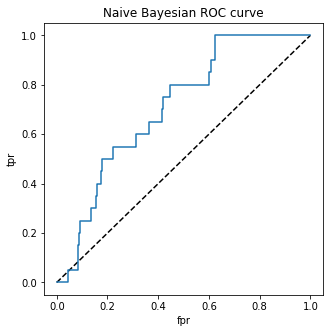

In [125]:
# Plotting the ROC Curve
plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='NB')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Naive Bayesian ROC curve')
plt.show()

In [126]:
# Creating a confusion matrix (this specific confusion matrix function accepts numpy arrays rather than python lists)
import numpy as np
probs = [classifier.classify(test_data[i][0]) for i in range(len(test_data))]
y = np.asarray(y)
probs = np.asarray(probs)
pd.crosstab(y, probs, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,-1,1,All
Actual,,,
-1,2019,1442,3461
1,6,14,20
All,2025,1456,3481
